In [ ]:
This projects focus is on the development of prediction models to classify a hotel bookings likelihood to be cancelled

## 1. Libraries

In [21]:
# linear algebra
import numpy as np 
from numpy import mean
from numpy import std

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

# Algorithms
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.impute import KNNImputer

import scipy.stats as stats
from scipy.stats import norm

## 2. Reading The Data

In [22]:
city = pd.read_csv('H1.csv')
city.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,342,2015,July,27,1,0,0,2,0,...,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,01/07/2015
1,0,737,2015,July,27,1,0,0,2,0,...,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,01/07/2015
2,0,7,2015,July,27,1,0,1,1,0,...,No Deposit,NULL,NULL,0,Transient,75.0,0,0,Check-Out,02/07/2015
3,0,13,2015,July,27,1,0,1,1,0,...,No Deposit,304,NULL,0,Transient,75.0,0,0,Check-Out,02/07/2015
4,0,14,2015,July,27,1,0,2,2,0,...,No Deposit,240,NULL,0,Transient,98.0,0,1,Check-Out,03/07/2015


In [ ]:
The Target Variable for this project will be - 'IsCanceled'

## 2.1. An Overview of the Data

In [4]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40060 entries, 0 to 40059
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IsCanceled                   40060 non-null  int64  
 1   LeadTime                     40060 non-null  int64  
 2   ArrivalDateYear              40060 non-null  int64  
 3   ArrivalDateMonth             40060 non-null  object 
 4   ArrivalDateWeekNumber        40060 non-null  int64  
 5   ArrivalDateDayOfMonth        40060 non-null  int64  
 6   StaysInWeekendNights         40060 non-null  int64  
 7   StaysInWeekNights            40060 non-null  int64  
 8   Adults                       40060 non-null  int64  
 9   Children                     40060 non-null  int64  
 10  Babies                       40060 non-null  int64  
 11  Meal                         40060 non-null  object 
 12  Country                      39596 non-null  object 
 13  MarketSegment   

In [ ]:
#There's a total of 40,060 records and 30 features in the city dataframe.

In [4]:
city.describe()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests
count,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.00000
mean,0.277634,92.675686,2016.121443,27.140864,15.821243,1.189815,3.128732,1.867149,0.128682,0.013904,0.044383,0.101722,0.146455,0.287968,0.527758,94.952930,0.138068,0.61977
std,0.447837,97.285315,0.722347,14.005441,8.883708,1.147812,2.461329,0.697285,0.445195,0.118998,0.205948,1.335115,1.001955,0.726548,7.428580,61.442418,0.351001,0.81393
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.00000
25%,0.000000,10.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.00000
50%,0.000000,57.000000,2016.000000,28.000000,16.000000,1.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,75.000000,0.000000,0.00000
75%,1.000000,155.000000,2017.000000,38.000000,24.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,125.000000,0.000000,1.00000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,2.000000,1.000000,26.000000,30.000000,17.000000,185.000000,508.000000,8.000000,5.00000


In [5]:
#Train Dataset Missing Values
total = city.isnull().sum().sort_values(ascending=False)
pc1 = city.isnull().sum()/city.isnull().count()*100
pc2 = (round(pc1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, pc2], axis=1, keys=['Total', '%'])
missing_data.head()


,Total,%
Country,464,1.2
ReservationStatusDate,0,0.0
DistributionChannel,0,0.0
LeadTime,0,0.0
ArrivalDateYear,0,0.0


In [ ]:
""""
From the tables above, we can note a few things: 

. First of all, that we need to convert categorical data into numeric data to allow for a smooth machine learning process. 

. Furthermore, we can see that some of the given variables have widely different ranges.
  To avoid misleading or erroneous results, we would need to scale our variables.
  
. Country feature in our dataset would need to be addressed as it has 1.2% of its records missing. 
  Some data preprocessing will be required here
  
. From this description, we can see that just over 27.7 percent of bookings had been canceled. This is a problem because it means that the dataset is imbalanced
To solve this problem, resampling will be done to balance things out

""""

## 2.2. Visualize Relationships

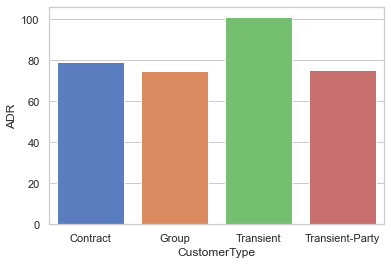

In [23]:
city_adr = city.groupby('CustomerType')['ADR'].mean().reset_index()

sns.set(palette='muted', color_codes=True, style='whitegrid')
sns.barplot(x= 'CustomerType', y= 'ADR', data=city_adr)
plt.show()

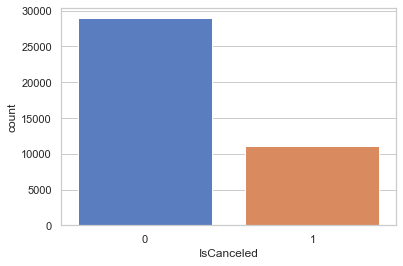

In [24]:
sns.countplot(x='IsCanceled',data=city)

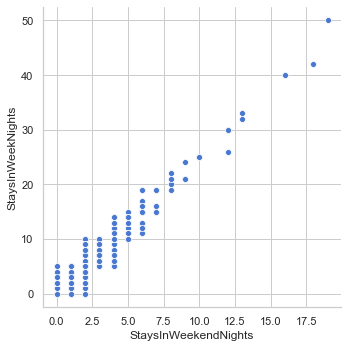

In [25]:
sns.relplot(x='StaysInWeekendNights', y='StaysInWeekNights',kind='scatter',data=city)

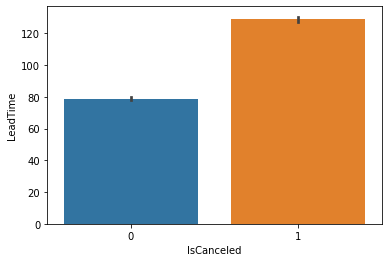

In [665]:
sns.barplot(x='IsCanceled', y='LeadTime',data=city)

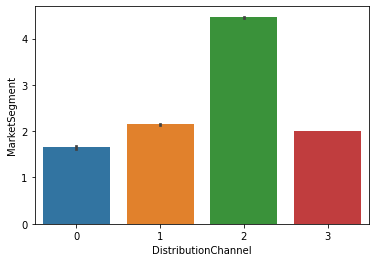

In [661]:
sns.barplot(x='DistributionChannel', y='MarketSegment',data=city)

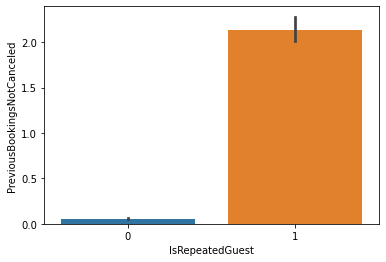

In [655]:
sns.barplot(x='IsRepeatedGuest', y='PreviousBookingsNotCanceled',data=city)

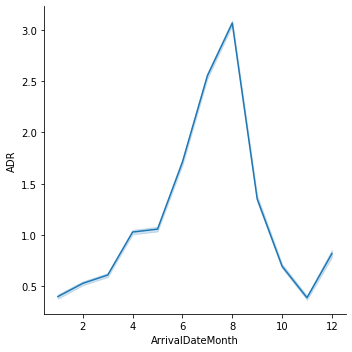

In [671]:
sns.relplot(x='ArrivalDateMonth', y='ADR',kind='line',data=city)

## 3. Data Preprocessing

In [26]:
#We will use the mode of all values in the Qualification feature to fill missing values because it is a categorical variable
city['Country'] = city['Country'].fillna(city['Country'].mode()[0])

In [27]:
#Convert categorical variable to numerical
city.loc[city['ReservationStatus']=='Canceled','ReservationStatus'] = 0
city.loc[city['ReservationStatus']=='Check-Out','ReservationStatus'] = 1
city.loc[city['ReservationStatus']=='No-Show','ReservationStatus'] = 2

In [28]:
#Convert categorical variable to numerical
city.loc[city['ArrivalDateMonth']=='January','ArrivalDateMonth'] = 1
city.loc[city['ArrivalDateMonth']=='February','ArrivalDateMonth'] = 2
city.loc[city['ArrivalDateMonth']=='March','ArrivalDateMonth'] = 3
city.loc[city['ArrivalDateMonth']=='April','ArrivalDateMonth'] = 4
city.loc[city['ArrivalDateMonth']=='May','ArrivalDateMonth'] = 5
city.loc[city['ArrivalDateMonth']=='June','ArrivalDateMonth'] = 6
city.loc[city['ArrivalDateMonth']=='July','ArrivalDateMonth'] = 7
city.loc[city['ArrivalDateMonth']=='August','ArrivalDateMonth'] = 8
city.loc[city['ArrivalDateMonth']=='September','ArrivalDateMonth'] = 9
city.loc[city['ArrivalDateMonth']=='October','ArrivalDateMonth'] = 10
city.loc[city['ArrivalDateMonth']=='November','ArrivalDateMonth'] = 11
city.loc[city['ArrivalDateMonth']=='December','ArrivalDateMonth'] = 12


In [29]:
#Convert categorical variable to numerical
city.loc[city['CustomerType']=='Contract','CustomerType'] = 0
city.loc[city['CustomerType']=='Group','CustomerType'] = 1
city.loc[city['CustomerType']=='Transient','CustomerType'] = 2
city.loc[city['CustomerType']=='Transient-Party','CustomerType'] = 3

In [30]:
#Convert categorical variable to numerical
city.loc[city['MarketSegment']=='Complementary','MarketSegment'] = 0
city.loc[city['MarketSegment']=='Corporate','MarketSegment'] = 1
city.loc[city['MarketSegment']=='Direct','MarketSegment'] = 2
city.loc[city['MarketSegment']=='Groups','MarketSegment'] = 3
city.loc[city['MarketSegment']=='Offline TA/TO','MarketSegment'] = 4
city.loc[city['MarketSegment']=='Online TA','MarketSegment'] = 5

In [31]:
#Convert categorical variable to numerical
city.loc[city['DistributionChannel']=='Corporate','DistributionChannel'] = 0
city.loc[city['DistributionChannel']=='Direct','DistributionChannel'] = 1
city.loc[city['DistributionChannel']=='TA/TO','DistributionChannel'] = 2
city.loc[city['DistributionChannel']=='Undefined','DistributionChannel'] = 3

In [32]:
#Split ReservationStatusDate into 3 columns
city['ReservationStatusDateDay'] = pd.DatetimeIndex(city['ReservationStatusDate'], dayfirst=True).day
city['ReservationStatusDateMonth'] = pd.DatetimeIndex(city['ReservationStatusDate'],dayfirst=True).month
city['ReservationStatusDateYear'] = pd.DatetimeIndex(city['ReservationStatusDate'], dayfirst=True).year

In [33]:
#Create ADR categories
data = [city]
for dataset in data:
    dataset['ADR'] = dataset['ADR'].astype('int64')
    dataset.loc[ dataset['ADR'] <= 50, 'ADR'] = 0
    dataset.loc[(dataset['ADR'] > 50) & (dataset['ADR'] <= 100), 'ADR'] = 1
    dataset.loc[(dataset['ADR'] > 100) & (dataset['ADR'] <= 150), 'ADR']   = 2
    dataset.loc[(dataset['ADR'] > 150) & (dataset['ADR'] <= 200), 'ADR']   = 3
    dataset.loc[ dataset['ADR'] > 200, 'ADR'] = 4

In [34]:
#Convert datatypes to Integer
data = [city]
for dataset in data:
    dataset['ArrivalDateMonth']= dataset['ArrivalDateMonth'].astype('int64')
    dataset['MarketSegment']= dataset['MarketSegment'].astype('int64')
    dataset['DistributionChannel']= dataset['DistributionChannel'].astype('int64')
    dataset['CustomerType']= dataset['CustomerType'].astype('int64')
    dataset['ReservationStatus']= dataset['ReservationStatus'].astype('int64')

In [35]:
#Drop Redundant Fields
city = city.drop(['Company','RequiredCarParkingSpaces','TotalOfSpecialRequests','Meal','Country','Agent','DepositType',
                  'AssignedRoomType','ReservedRoomType','ReservationStatusDate','Babies'], axis=1)

## 4. Outlier Detection

In [36]:
# identify outliers with standard deviation
city_col = city[['LeadTime','StaysInWeekendNights','StaysInWeekNights','Adults','Children','PreviousCancellations',
                'PreviousBookingsNotCanceled','BookingChanges', 'DaysInWaitingList','ADR']]

upper = city_col.mean() + 2*city_col.std() #Upper limit
lower = city_col.mean() - 2*city_col.std() #Lower Limit
city_col[(city_col > upper) | (city_col < lower)] #Identify Outliers
ncity=city_col[(city_col < upper) & (city_col > lower)] #Filter out Outliers

#Fill NAN values using K-Nearest Neighbor Algorithm
imputer = KNNImputer(n_neighbors=2)
newcity= imputer.fit_transform(ncity)

#Assign columns to new DataFrame
hbcity = pd.DataFrame(data=newcity,columns=['LeadTime','StaysInWeekendNights', 'StaysInWeekNights', 'Adults','Children',
                                            'PreviousCancellations','PreviousBookingsNotCanceled','BookingChanges',
                                            'DaysInWaitingList','ADR'])
hbcity = pd.concat([hbcity,pd.DataFrame(data=city,columns=['IsCanceled','ArrivalDateYear', 'ArrivalDateMonth',
                                                           'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
                                                           'MarketSegment', 'DistributionChannel', 'IsRepeatedGuest',
                                                           'CustomerType','ReservationStatus', 'ReservationStatusDateDay',
                                                           'ReservationStatusDateMonth', 'ReservationStatusDateYear'])],axis=1)


## 5. Scale Features

In [37]:
#Scale 'LeadTime'
lt_city=hbcity['LeadTime'].values.reshape(-1,1)
#Define StandardScaler
scaler = StandardScaler()
#Transform Variable
lt_city_scaled = scaler.fit_transform(lt_city)
hbcity['LeadTime'] = lt_city_scaled

#Scale 'DaysInWaitingList'
dwl_city=hbcity['DaysInWaitingList'].values.reshape(-1,1)
#Define StandardScaler
scaler = StandardScaler()
#Transform Variable
dwl_city_scaled = scaler.fit_transform(dwl_city)
hbcity['DaysInWaitingList'] = dwl_city_scaled

#Scale 'ADR'
adr_city=hbcity['ADR'].values.reshape(-1,1)
#Define StandardScaler
scaler = StandardScaler()
#Transform Variable
adr_city_scaled = scaler.fit_transform(adr_city)
hbcity['ADR'] = adr_city_scaled

### 6. Heat Map

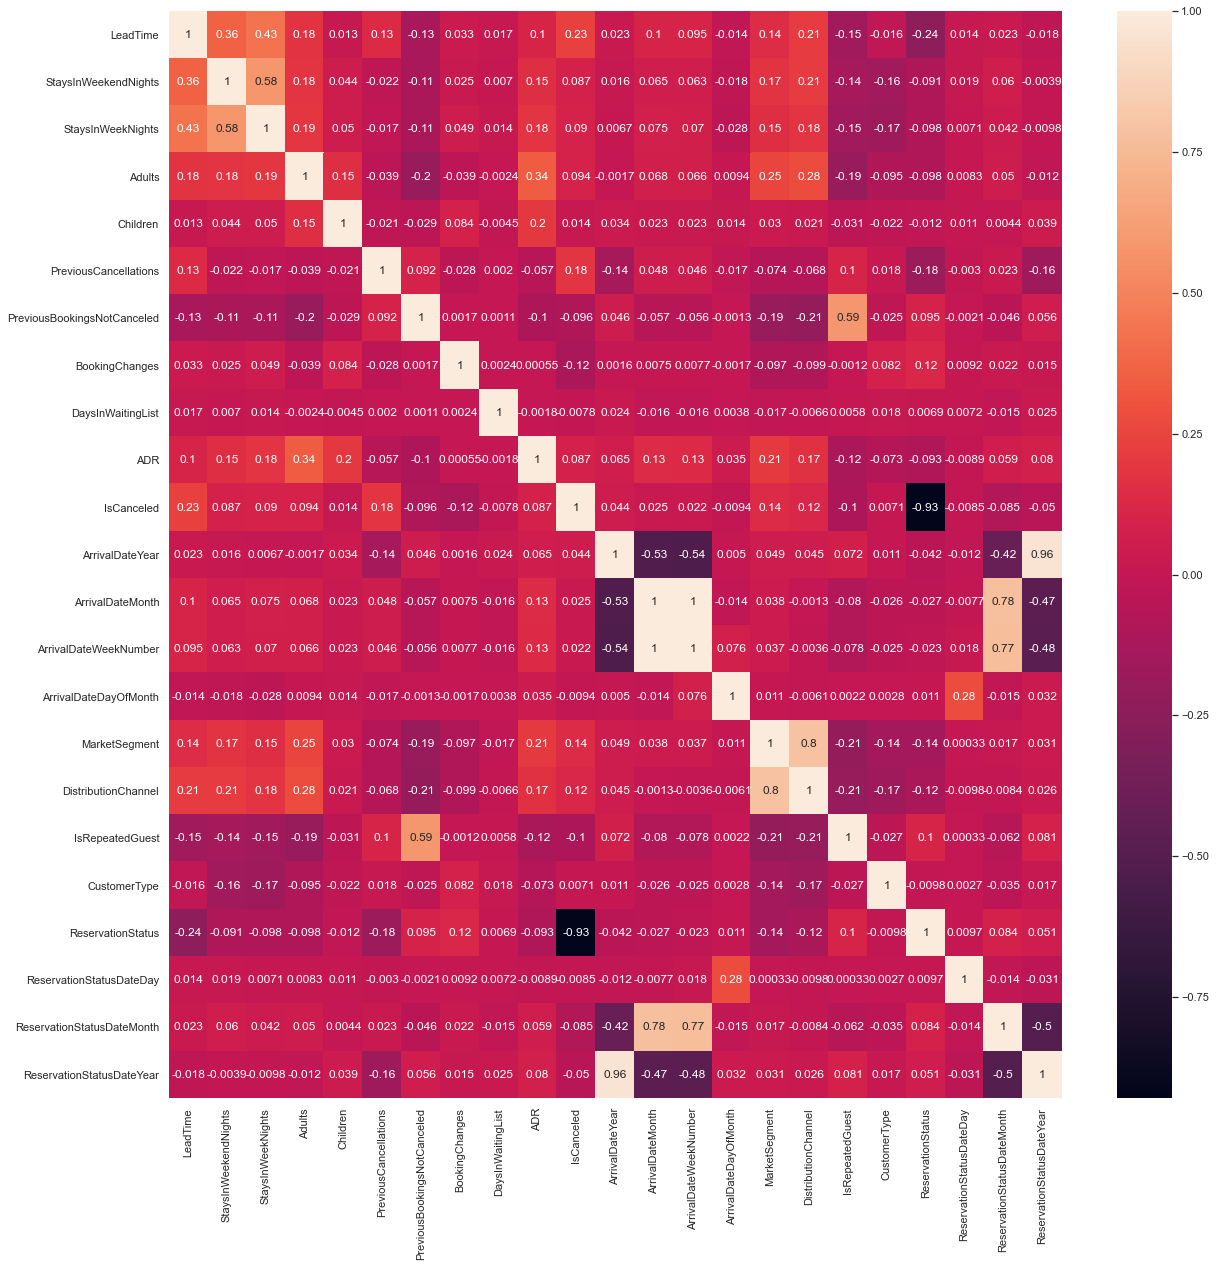

In [38]:
#How correlated are the features?
plt.figure(figsize=(20,20))
sns.heatmap(hbcity.corr(),annot=True)

## 7. Balancing Dataset by Oversampling(SMOTE Algorithm)

In [39]:
# Dependent and Independent variables
X = hbcity.drop(['IsCanceled'],axis=1) #Returns all columns in the dataset except IsCanceled
y = hbcity['IsCanceled'] #Returns just the IsCanceled column

In [40]:
#X and y Oversampling
print("Before OverSampling, counts of label '1': {}".format(sum(y == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y == 0))) 
  
# import SMOTE module from imblearn library 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X, y.ravel()) 
  
print('After OverSampling, the shape of X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

Before OverSampling, counts of label '1': 11122
Before OverSampling, counts of label '0': 28938 

After OverSampling, the shape of X: (57876, 22)
After OverSampling, the shape of y: (57876,) 

After OverSampling, counts of label '1': 28938
After OverSampling, counts of label '0': 28938


## 8. Split Data into Train & Test

In [41]:
from sklearn.model_selection import train_test_split
#Split Data into Train & Test
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size=0.3, random_state=100)

In [42]:
#Train and Test shape(70% train, 30% test)
print("Number transactions X_train dataset: ", X_train.shape) 
print("Number transactions y_train dataset: ", y_train.shape) 
print("Number transactions X_test dataset: ", X_test.shape) 
print("Number transactions y_test dataset: ", y_test.shape) 

Number transactions X_train dataset:  (40513, 22)
Number transactions y_train dataset:  (40513,)
Number transactions X_test dataset:  (17363, 22)
Number transactions y_test dataset:  (17363,)


## 9. Using k-fold cross-validation to check the skill level of different models

In [43]:
# Create 10 folds
seed = 100
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

### 9.1 Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression
#Instatiate Model
lr = LogisticRegression(solver='liblinear')

In [45]:
# Train and evaluate model using kfolds 
lr_results = cross_val_score(lr, X_train, y_train, cv=kfold, scoring='accuracy')
print(lr_results)
print("Mean:", lr_results.mean())

[0.988154   0.988154   0.98790721 0.98666996 0.98518884 0.99012589
 0.98765737 0.99111331 0.99086645 0.98839793]
Mean: 0.9884234950579518


### 9.2. Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier
#Instantiate Model
decision_tree = DecisionTreeClassifier()

In [47]:
# Train and evaluate model using kfolds 
decision_tree_results = cross_val_score(decision_tree, X_train, y_train, cv=kfold, scoring='accuracy')
print(decision_tree_results)
print("Mean:", decision_tree_results.mean())

[0.99876604 0.99851925 0.99802567 0.99728462 0.99728462 0.99753147
 0.99827203 0.99802518 0.99728462 0.99777833]
Mean: 0.9978771831410131


### 9.3. Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier
#Instantiate model
random_forest = RandomForestClassifier(n_estimators=50)

In [49]:
# Train and evaluate model using kfolds 
random_forest_results = cross_val_score(random_forest, X_train, y_train, cv=kfold, scoring='accuracy')
print(random_forest_results)
print("Mean:", random_forest_results.mean())

[0.99777887 0.99802567 0.99728529 0.99629721 0.99629721 0.99629721
 0.99753147 0.99753147 0.99654406 0.99728462]
Mean: 0.9970873095573392


In [ ]:
# The best performing model is the Decision Tree. This will be used to train the final model

## 10. Train final model with the dataset

In [50]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

## 11. Make prediction with model

In [51]:
y_pred = decision_tree.predict(X_test)

### 11.1. Prediction Accuracy Score

In [52]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

#Produced accuracy score of 99.8%

0.9983297817197488


## 12. Classification Report & Confusion Matrix

In [53]:
#Import Algorithm
from sklearn.metrics import classification_report, confusion_matrix

In [54]:
#Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8509
           1       1.00      1.00      1.00      8854

    accuracy                           1.00     17363
   macro avg       1.00      1.00      1.00     17363
weighted avg       1.00      1.00      1.00     17363

